In [ ]:
import torch


In [ ]:
from google.colab import files
files.upload()   # upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raspingharecodes","key":"8adafb8a86743689a528dc5fc5ce79c2"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uraninjo/augmented-alzheimer-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset
License(s): GNU Lesser General Public License 3.0
 96% 366M/380M [00:01<00:00, 199MB/s]
100% 380M/380M [00:01<00:00, 217MB/s]


In [ ]:
!unzip augmented-alzheimer-mri-dataset.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/OriginalDataset/NonDemented/31 (10).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (100).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (11).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (12).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (13).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (14).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (15).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (16).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (17).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (18).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (19).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (2).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (20).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (21).jpg  
  inflating: data/OriginalDataset/NonDemented/31 (22).jpg  
  inflating: data/OriginalDataset/NonDemented/31 

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.9 MB/s eta 0:00:00


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
from pathlib import Path

root = Path("data")

import os
def walk_through_dir(dir_path):
  '''Walks through dir_path returning its contents'''
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [ ]:
walk_through_dir(root)

There are 2 directories and 0 images in 'data'
There are 4 directories and 0 images in 'data/AugmentedAlzheimerDataset'
There are 0 directories and 9600 images in 'data/AugmentedAlzheimerDataset/NonDemented'
There are 0 directories and 8960 images in 'data/AugmentedAlzheimerDataset/MildDemented'
There are 0 directories and 8960 images in 'data/AugmentedAlzheimerDataset/VeryMildDemented'
There are 0 directories and 6464 images in 'data/AugmentedAlzheimerDataset/ModerateDemented'
There are 4 directories and 0 images in 'data/OriginalDataset'
There are 0 directories and 3200 images in 'data/OriginalDataset/NonDemented'
There are 0 directories and 896 images in 'data/OriginalDataset/MildDemented'
There are 0 directories and 2240 images in 'data/OriginalDataset/VeryMildDemented'
There are 0 directories and 64 images in 'data/OriginalDataset/ModerateDemented'


In [ ]:
from torch.utils.data import DataLoader

image_path = root / "AugmentedAlzheimerDataset"

mildDemented = image_path / "MildDemented"
moderateDemented = image_path / "ModerateDemented"
nonDemented = image_path / "NonDemented"
veryMildDemented = image_path / "VeryMildDemented"




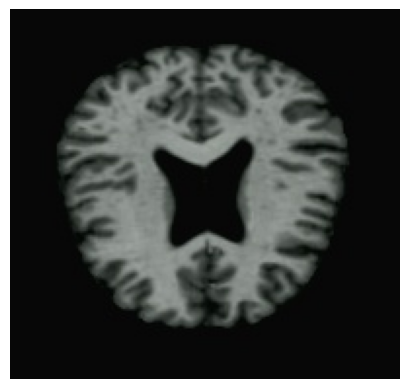

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

jpg_files = [f for f in os.listdir(veryMildDemented
                                   ) if f.endswith('.jpg')]
random_jpg_file = random.choice(jpg_files)

img_path = os.path.join(veryMildDemented, random_jpg_file)
img = mpimg.imread(img_path)

plt.imshow(img)
plt.axis('off')
plt.show()

# Task
To perform k-fold cross-validation on the image dataset, I'll set up image transformations for resizing and normalization. Then, I'll load the full dataset from 'data/OriginalDataset' and divide it into 5 folds. For each fold, I'll create separate training and validation data loaders, preparing the data for model training and evaluation.

## Load and Transform Data

### Subtask:
Define image transformations (resizing, ToTensor, normalization) and load the full dataset using `torchvision.datasets.ImageFolder` from the 'data/OriginalDataset' path.


**Reasoning**:
To define the image transformations and load the dataset, I need to import the necessary modules, create a composition of transformations, and then use `ImageFolder` to load the dataset.



In [ ]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split

# 1. Define a composition of transformations - only resize here, as the processor handles ToTensor and Normalize
data_transforms = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 224x224 pixels
])

# 2. Load the dataset using ImageFolder and apply data_transforms
full_dataset = ImageFolder(root=image_path, transform=data_transforms)

total_size = len(full_dataset)
test_size = int(0.2 * total_size)
dev_size = total_size - test_size

dev_dataset, test_dataset = random_split(full_dataset,
                                  [dev_size, test_size],
                                  generator=torch.Generator().manual_seed(42))

print(f"Number of images in the dataset: {len(full_dataset)}")
print(f"Dev set: {len(dev_dataset)} Test set: {len(test_dataset)}")
print(f"Classes: {full_dataset.classes}")

Number of images in the dataset: 33984
Dev set: 27188 Test set: 6796
Classes: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


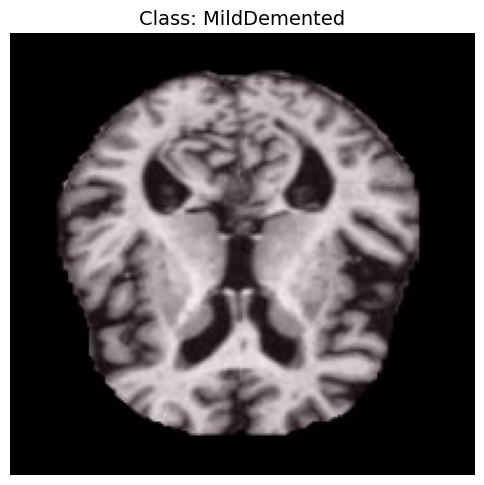

Displaying image 6010 - Class: MildDemented


In [ ]:
import matplotlib.pyplot as plt
import random

random_index = random.randint(0, len(full_dataset) - 1)
random_image, label = full_dataset[random_index]

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f'Class: {full_dataset.classes[label]}', fontsize=14)
plt.axis('off')
plt.show()

print(f"Displaying image {random_index} - Class: {full_dataset.classes[label]}")

In [ ]:
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import KFold

num_splits = 5  # Define the number of folds for cross-validation
kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)

BATCH_SIZE = 32 # Define batch size for DataLoaders

# Lists to store training and validation DataLoaders for each fold
train_loaders = []
val_loaders = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(dev_dataset)):
    print(f"\n--- Creating DataLoader for Fold {fold+1}/{num_splits} ---")

    # Create Subset for training and validation data
    train_subset = Subset(dev_dataset, train_idx)
    val_subset = Subset(dev_dataset, val_idx)

    # Create DataLoaders for current fold
    train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=False)

    # Store DataLoaders
    train_loaders.append(train_loader)
    val_loaders.append(val_loader)

    print(f"Fold {fold+1}: Training DataLoader has {len(train_loader)} batches (total {len(train_subset)} samples).")
    print(f"Fold {fold+1}: Validation DataLoader has {len(val_loader)} batches (total {len(val_subset)} samples).")

print("\nAll training and validation DataLoaders created for all folds.")


--- Creating DataLoader for Fold 1/5 ---
Fold 1: Training DataLoader has 680 batches (total 21750 samples).
Fold 1: Validation DataLoader has 170 batches (total 5438 samples).

--- Creating DataLoader for Fold 2/5 ---
Fold 2: Training DataLoader has 680 batches (total 21750 samples).
Fold 2: Validation DataLoader has 170 batches (total 5438 samples).

--- Creating DataLoader for Fold 3/5 ---
Fold 3: Training DataLoader has 680 batches (total 21750 samples).
Fold 3: Validation DataLoader has 170 batches (total 5438 samples).

--- Creating DataLoader for Fold 4/5 ---
Fold 4: Training DataLoader has 680 batches (total 21751 samples).
Fold 4: Validation DataLoader has 170 batches (total 5437 samples).

--- Creating DataLoader for Fold 5/5 ---
Fold 5: Training DataLoader has 680 batches (total 21751 samples).
Fold 5: Validation DataLoader has 170 batches (total 5437 samples).

All training and validation DataLoaders created for all folds.


In [ ]:
import torch
from transformers import ViTForImageClassification, ViTImageProcessor, TrainingArguments, Trainer
from torch.utils.data import DataLoader
import numpy as np


# 1. Load the pretrained model and processor
model_name = "google/vit-base-patch16-224"
processor = ViTImageProcessor.from_pretrained(model_name)

num_labels = len(full_dataset.classes)



# 4. Custom dataset that works with JPG/PIL Images
class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        # Get PIL Image (converted from JPG) and label
        image, label = self.dataset[idx]

        # Processor handles PIL Images perfectly
        inputs = self.processor(images=image, return_tensors="pt")

        # Remove batch dimension and add label
        inputs = {k: v.squeeze(0) for k, v in inputs.items()}
        inputs['labels'] = label
        return inputs




/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
import evaluate
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average='weighted', zero_division=0
    )

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

fold_resukls = []
for i in range(len(train_loaders)):
  print(f"Fold {i+1}")

  train_dataset = ImageDataset(train_loaders[i].dataset, processor)
  val_dataset = ImageDataset(val_loaders[i].dataset, processor)

  model = ViTForImageClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    ignore_mismatched_sizes=True  # For changing the classification head
  )

  training_args = TrainingArguments(
    output_dir="./vit-finetuned",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    remove_unused_columns=False,
    report_to="tensorboard",
  )

  accuracy_metric = evaluate.load("accuracy")



  trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
  )

  trainer.train()

  results = trainer.evaluate()

  fold_resukls.append(results)
  print(f"Validation accuracy: {results['eval_accuracy']:.4f}")
  print(f"Validation loss: {results['eval_loss']:.4f}")
  print(f"Validation f1: {results['eval_f1']:.4f}")
  print(f"Validation precision: {results['eval_precision']:.4f}")
  print(f"Validation recall: {results['eval_recall']:.4f}")


Fold 1


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.435000,0.329762,0.865392,0.879218,0.865392,0.863997
2,0.115300,0.118151,0.961383,0.961862,0.961383,0.961435
3,0.016800,0.175326,0.959728,0.961408,0.959728,0.959686
4,0.006100,0.106407,0.975910,0.975950,0.975910,0.975926
5,0.000100,0.102336,0.977014,0.977036,0.977014,0.977018


Validation accuracy: 0.9770
Validation loss: 0.1023
Validation f1: 0.9770
Validation precision: 0.9770
Validation recall: 0.9770
Fold 2


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.444900,0.268561,0.893527,0.907475,0.893527,0.894426
2,0.107600,0.247566,0.930121,0.933878,0.930121,0.929790
3,0.020100,0.131927,0.971313,0.971295,0.971313,0.971239
4,0.002500,0.132653,0.972232,0.972229,0.972232,0.972196
5,0.000100,0.124624,0.975542,0.975505,0.975542,0.975495


Validation accuracy: 0.9755
Validation loss: 0.1246
Validation f1: 0.9755
Validation precision: 0.9755
Validation recall: 0.9755
Fold 3


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.453700,0.440422,0.816661,0.864814,0.816661,0.807497
2,0.116000,0.122538,0.958808,0.959736,0.958808,0.958959
3,0.019700,0.172040,0.959176,0.960485,0.959176,0.959076
4,0.002400,0.121211,0.973887,0.974099,0.973887,0.973922
5,0.000100,0.111667,0.976462,0.976592,0.976462,0.976472


Validation accuracy: 0.9765
Validation loss: 0.1117
Validation f1: 0.9765
Validation precision: 0.9766
Validation recall: 0.9765
Fold 4


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.420900,0.315327,0.867206,0.875101,0.867206,0.861820
2,0.119300,0.206118,0.934707,0.937960,0.934707,0.933520
3,0.032200,0.164743,0.961560,0.962028,0.961560,0.961445
4,0.004500,0.139975,0.969836,0.970183,0.969836,0.969841
5,0.000800,0.132603,0.972227,0.972241,0.972227,0.972186


Validation accuracy: 0.9722
Validation loss: 0.1326
Validation f1: 0.9722
Validation precision: 0.9722
Validation recall: 0.9722
Fold 5


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.455500,0.281568,0.894979,0.902392,0.894979,0.896124
2,0.122100,0.134941,0.951996,0.952372,0.951996,0.952110
3,0.030900,0.151602,0.963031,0.963669,0.963031,0.963132
4,0.005100,0.159505,0.965054,0.965710,0.965054,0.964995
5,0.000100,0.127771,0.973147,0.973121,0.973147,0.973126


Validation accuracy: 0.9731
Validation loss: 0.1278
Validation f1: 0.9731
Validation precision: 0.9731
Validation recall: 0.9731


In [ ]:
best_fold = np.argmax([r['eval_accuracy'] for r in fold_results])

# Train final model on ALL dev data (all k-fold data combined)
final_train_dataset = ImageDataset(dev_dataset, processor)

# Reinitialize model
final_model = ViTForImageClassification.from_pretrained(
    model_name,
    num_labels=num_labels,
    ignore_mismatched_sizes=True
)

final_training_args = TrainingArguments(
    output_dir="./vit-final-model",
    eval_strategy="no",  # No validation during final training
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    num_train_epochs=5,  # Use same hyperparameters from best fold
    weight_decay=0.01,
    fp16=True,
    remove_unused_columns=False,
    report_to="none",
)

final_trainer = Trainer(
    model=final_model,
    args=final_training_args,
    train_dataset=final_train_dataset,
    compute_metrics=compute_metrics,
)

final_trainer.train()

# ==================== TEST ON HELD-OUT TEST SET ====================
print(f"\n{'='*50}")
print("FINAL EVALUATION ON TEST SET")
print(f"{'='*50}")

test_dataset_wrapped = ImageDataset(test_dataset, processor)

test_results = final_trainer.evaluate(test_dataset_wrapped)

print(f"\n🎯 FINAL TEST RESULTS:")
print(f"Test Accuracy: {test_results['eval_accuracy']:.4f}")
print(f"Test Loss: {test_results['eval_loss']:.4f}")
print(f"Test F1: {test_results['eval_f1']:.4f}")
print(f"Test Precision: {test_results['eval_precision']:.4f}")
print(f"Test Recall: {test_results['eval_recall']:.4f}")

# Save the final model
final_trainer.save_model("./vit-final-model-best")
processor.save_pretrained("./vit-final-model-best")
print("\n✅ Final model saved to './vit-final-model-best'")

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,0.742100
1000,0.438900
1500,0.296100
2000,0.175400
2500,0.111200
3000,0.093300
3500,0.066200
4000,0.018000
4500,0.020400
5000,0.017800



FINAL EVALUATION ON TEST SET



🎯 FINAL TEST RESULTS:
Test Accuracy: 0.9848
Test Loss: 0.0689
Test F1: 0.9848
Test Precision: 0.9848
Test Recall: 0.9848

✅ Final model saved to './vit-final-model-best'


In [ ]:
test_results

{'eval_loss': 0.06887805461883545,
 'eval_accuracy': 0.9848440258975868,
 'eval_precision': 0.9848361597143226,
 'eval_recall': 0.9848440258975868,
 'eval_f1': 0.9848366124609802,
 'eval_runtime': 47.745,
 'eval_samples_per_second': 142.339,
 'eval_steps_per_second': 17.803,
 'epoch': 5.0}

For Augmented Dataset Transformer:

- Test Accuracy: 0.9826

- Test Loss: 0.0789

- Test F1: 0.9826

- Test Precision: 0.9826

- Test Recall: 0.9826


For Original Dataset Transformer
- Test Accuracy: 0.9789

- Test Loss: 0.0811

- Test F1: 0.9788

- Test Precision: 0.9789

- Test Recall: 0.9789

In [ ]:
# efficient net
import torch
from transformers import EfficientNetForImageClassification, EfficientNetImageProcessor, TrainingArguments, Trainer

# 1. EfficientNet Setup
efficientnet_model_name = "google/efficientnet-b0"
efficientnet_processor = EfficientNetImageProcessor.from_pretrained(efficientnet_model_name)
efficientnet_fold_results = []
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')





In [ ]:
# EFFICIENTNET
import torch
import numpy as np
from transformers import EfficientNetForImageClassification, EfficientNetImageProcessor, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# --- Define Compute Metrics Locally ---
# This function is now defined within this block, replacing the need for an external call.
def efficientnet_compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average='weighted', zero_division=0
    )

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# --- K-Fold Cross-Validation ---
efficientnet_fold_results = []
# Uses the train_loaders and val_loaders generated in Cell 22
for i in range(len(train_loaders)):
    print(f"\n--- EfficientNet Fold {i+1} ---")

    # Use EfficientNet-specific processor with the reusable ImageDataset class
    train_dataset = ImageDataset(train_loaders[i].dataset, efficientnet_processor)
    val_dataset = ImageDataset(val_loaders[i].dataset, efficientnet_processor)

    # Load EfficientNet model
    efficientnet_model = EfficientNetForImageClassification.from_pretrained(
        efficientnet_model_name,
        num_labels=num_labels, # Uses previous num_labels defined earlier
        ignore_mismatched_sizes=True
    ).to(device)

    # hyperparamters consistent
    efficientnet_training_args = TrainingArguments(
        output_dir=f"./efficientnet-finetuned/fold-{i+1}",
        eval_strategy="epoch",
        save_strategy="epoch",
        learning_rate=0.001,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=10,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        fp16=True,
        remove_unused_columns=False,
        report_to="tensorboard",
        run_name=f"efficientnet-fold-{i+1}",
    )

    efficientnet_trainer = Trainer(
        model=efficientnet_model,
        args=efficientnet_training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=efficientnet_compute_metrics, # NOW USES LOCAL FUNCTION
    )

    efficientnet_trainer.train()
    results = efficientnet_trainer.evaluate()
    efficientnet_fold_results.append(results)
    print(f"EfficientNet Fold {i+1} Validation Accuracy: {results['eval_accuracy']:.4f}")

# final training on dev set
print(f"\n{'='*50}")
print("EfficientNet FINAL TRAINING ON DEV SET")
print(f"{'='*50}")



# Save the final model
# final_efficientnet_trainer.save_model("./efficientnet-final-model-best")
# efficientnet_processor.save_pretrained("./efficientnet-final-model-best")
# print("✅ EfficientNet Final model saved to './efficientnet-final-model-best'")

ValueError: module functions cannot set METH_CLASS or METH_STATIC

In [ ]:
final_train_dataset = ImageDataset(dev_dataset, efficientnet_processor)
final_efficientnet_model = EfficientNetForImageClassification.from_pretrained(
    efficientnet_model_name,
    num_labels=num_labels,
    ignore_mismatched_sizes=True
).to(device)

final_efficientnet_training_args = TrainingArguments(
    output_dir="./efficientnet-final-model",
    eval_strategy="no",
    save_strategy="epoch",
    learning_rate=0.001,
    per_device_train_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    fp16=True,
    remove_unused_columns=False,
    report_to="none",
)

final_efficientnet_trainer = Trainer(
    model=final_efficientnet_model,
    args=final_efficientnet_training_args,
    train_dataset=final_train_dataset,
    compute_metrics=efficientnet_compute_metrics, # NOW USES LOCAL FUNCTION
)
final_efficientnet_trainer.train()

# --- FINAL EVALUATION ON HELD-OUT TEST SET ---
print(f"\n{'='*50}")
print("EfficientNet FINAL EVALUATION ON TEST SET")
print(f"{'='*50}")
test_dataset_wrapped = ImageDataset(test_dataset, efficientnet_processor)
efficientnet_test_results = final_efficientnet_trainer.evaluate(test_dataset_wrapped)

print(f"\n🎯 EfficientNet FINAL TEST RESULTS:")
print(f"Test Accuracy: {efficientnet_test_results['eval_accuracy']:.4f}")
print(f"Test Loss: {efficientnet_test_results['eval_loss']:.4f}")
print(f"Test F1: {efficientnet_test_results['eval_f1']:.4f}")
print(f"Test Precision: {efficientnet_test_results['eval_precision']:.4f}")
print(f"Test Recall: {efficientnet_test_results['eval_recall']:.4f}")

Some weights of EfficientNetForImageClassification were not initialized from the model checkpoint at google/efficientnet-b0 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 1280]) in the checkpoint and torch.Size([4, 1280]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,0.730100
1000,0.412200
1500,0.289300
2000,0.172500
2500,0.137400
3000,0.109600
3500,0.078400
4000,0.048200


In [ ]:
Test Accuracy: 0.9867
Test Loss: 0.0423
Test F1: 0.9867
Test Precision: 0.9867
Test Recall: 0.9867